In [1]:
import json
import pydot
import requests
import graphviz
import math
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import time

from pprint import pprint
from math import ceil
from pandas import DataFrame
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.inspection import permutation_importance

In [2]:
# read csv
data = pd.read_csv('DataTableToRegress.csv')
featnames = ['Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'Cr', 'Nb']
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
# featnames = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']
# data.describe

In [3]:
#set up test data
X = data[featnames]  # Features

ylin = data['Tot Vol Frac Other']
ylog = data['Acceptable']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#forest regression
# Record the start time
start_time = time.time()

#split data
y = data['Tot Vol Frac Other']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators= 100 #200, 209, 600
depth_max = 10

## initialize model
rf_clf = RandomForestRegressor(n_estimators=n_estimators, max_depth=depth_max, random_state=42) #random_state=42
rf_clf.fit(X_train,y_train)

#predictions 
y_hat = rf_clf.predict(X_test)
r2 = r2_score(y_test, y_hat)
print(f'R2 Score: {r2}')

ev = explained_variance_score(y_test, y_hat)
print(f'EV Score: {ev}')

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the elapsed time
print(f'The code took {elapsed_time:.2f} seconds to run.')

R2 Score: 0.8274897852072589
EV Score: 0.8288565923200218
The code took 0.55 seconds to run.


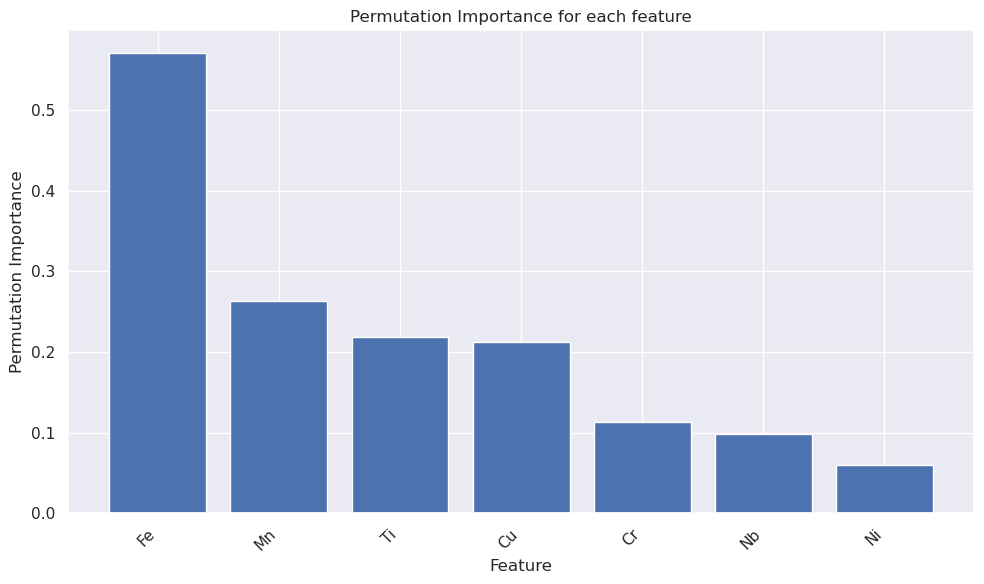

In [5]:
from sklearn.inspection import permutation_importance

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_clf, X_test, y_test, n_repeats=30, random_state=0)

# Get the sorted indices of feature importance
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.xticks(range(X_test.shape[1]), np.array(featnames)[sorted_idx], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Importance for each feature')
plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       259
           1       0.88      0.90      0.89        72

    accuracy                           0.95       331
   macro avg       0.93      0.93      0.93       331
weighted avg       0.95      0.95      0.95       331

The code took 0.32 seconds to run.


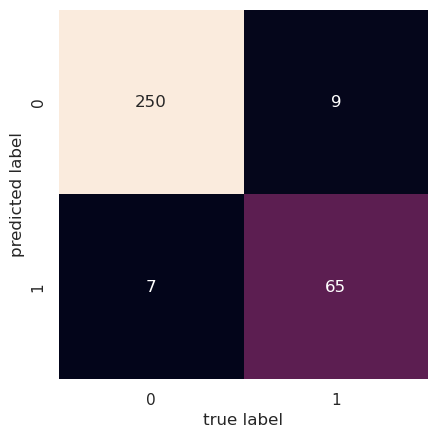

In [6]:
#forest classification
# Record the start time
start_time = time.time()

#split data
y = data['Acceptable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators= 100 #200, 209, 600
depth_max = 10

## initialize model
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth_max, random_state=42) #random_state=42
model.fit(X_train,y_train)

#predictions 
y_hat = model.predict(X_test)


#reports
print(metrics.classification_report(y_hat, y_test))
mat = confusion_matrix(y_test, y_hat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the elapsed time
print(f'The code took {elapsed_time:.2f} seconds to run.')

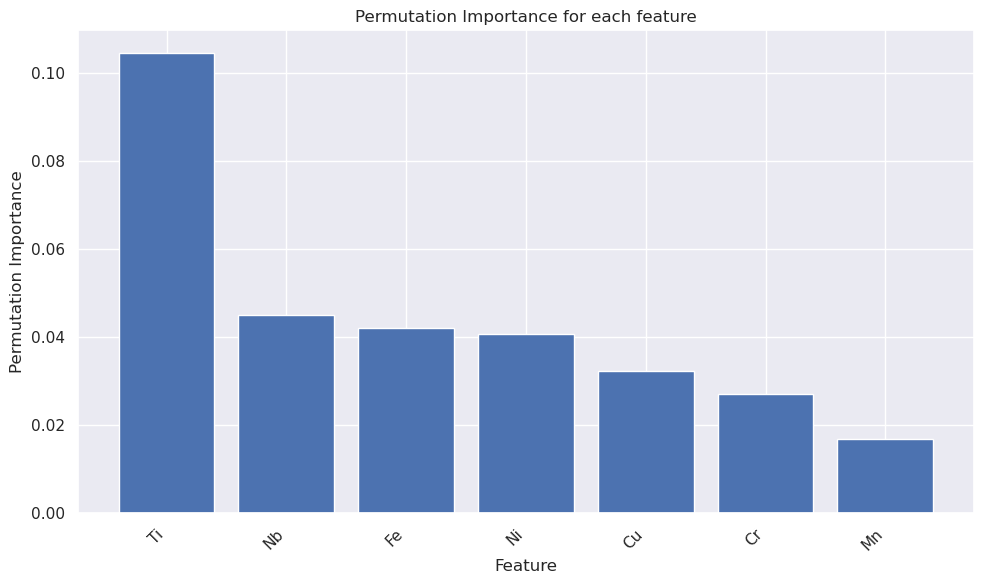

In [7]:
from sklearn.inspection import permutation_importance

# Calculate Permutation Importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=0)

# Get the sorted indices of feature importance
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.xticks(range(X_test.shape[1]), np.array(featnames)[sorted_idx], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Importance for each feature')
plt.tight_layout()
plt.show()
